In [3]:
import pandas as pd
# Import missingno as msno
import missingno as msno

### Using a time-series dataset

In [4]:
# Load the airquality dataset
airquality = pd.read_csv('data/air-quality.csv', parse_dates=['Date'], index_col='Date')

# Create a nullity DataFrame airquality_nullity
airquality_nullity = airquality.isnull()
print(airquality_nullity.head())

            Ozone  Solar   Wind   Temp
Date                                  
1976-05-01  False  False  False  False
1976-05-02  False  False  False  False
1976-05-03  False  False  False  False
1976-05-04  False  False  False  False
1976-05-05   True   True  False  False


In [5]:
# Calculate total of missing values
missing_values_sum = airquality_nullity.sum()
print('Total Missing Values:\n', missing_values_sum)

Total Missing Values:
 Ozone    37
Solar     7
Wind      0
Temp      0
dtype: int64


In [6]:
# Calculate percentage of missing values
missing_values_percent = airquality_nullity.mean() * 100
print('Percentage of Missing Values:\n', missing_values_percent)

Percentage of Missing Values:
 Ozone    24.183007
Solar     4.575163
Wind      0.000000
Temp      0.000000
dtype: float64


Now that we've calculated the numerical values, it's time to visualize them graphically!

### Visualizing Missingness

### Plot a bar chart of the missing values

<AxesSubplot:>

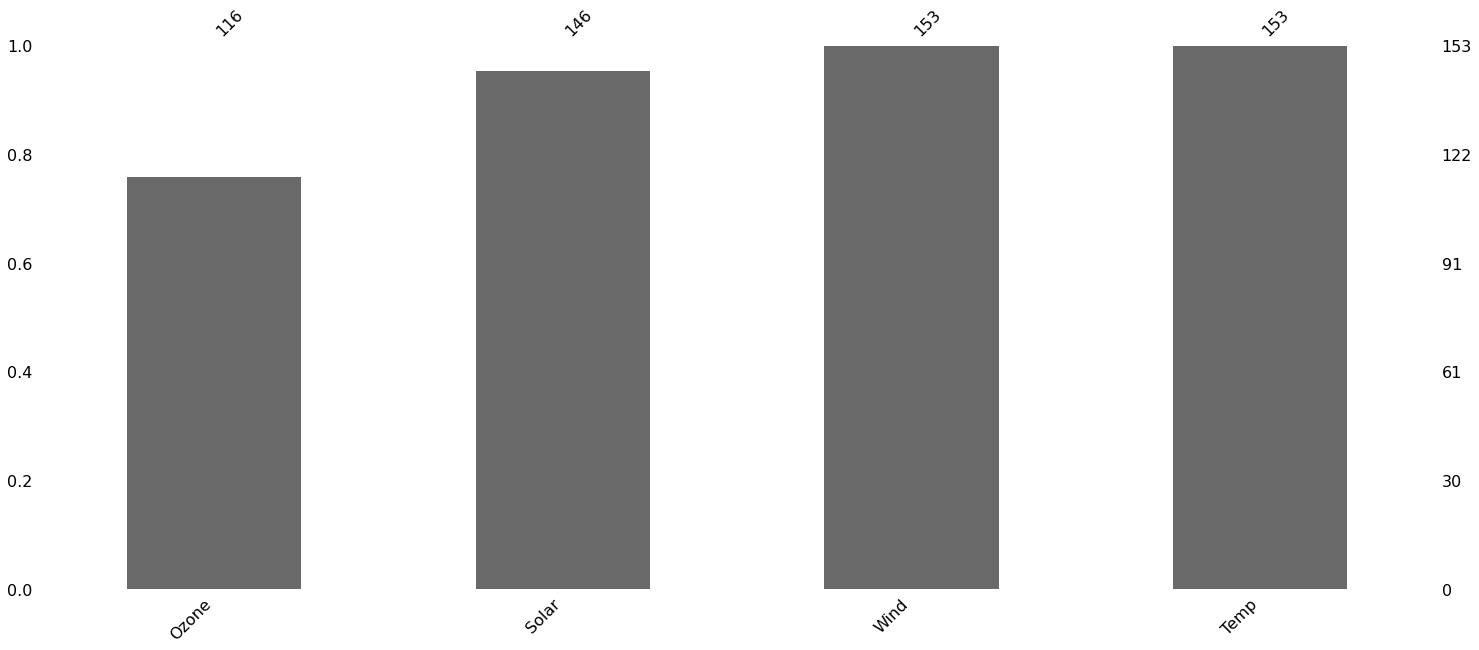

In [11]:

# Plot amount of missingness
msno.bar(airquality)

### Plot the nullity matrix of airquality

<AxesSubplot:>

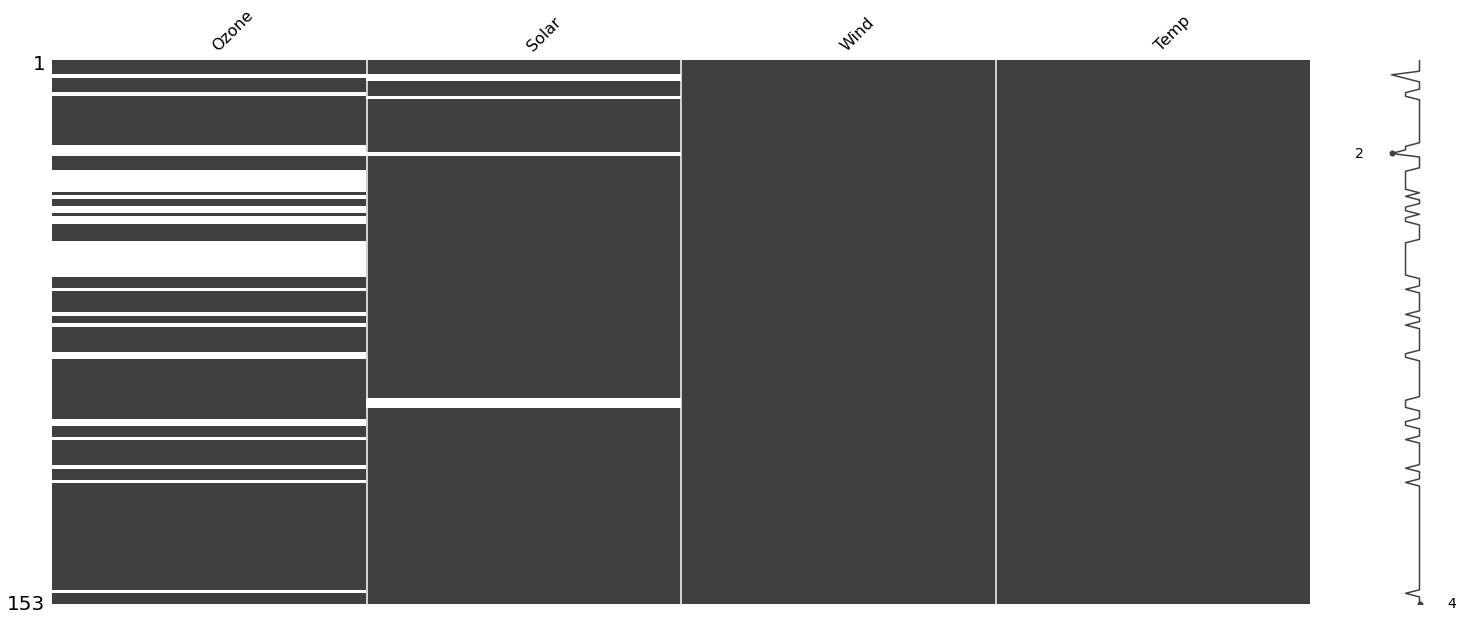

In [12]:
# Plot nullity matrix of airquality
msno.matrix(airquality)

### Sparkline on the right summarizes genereal shape the data completeness and points out the row with the minimum number of null valuesin the dataframe as well as total count of columns at the bottom  

### Plot the nullity matrix of airquality  across the monthly frequency

Since this is Time_series dataset, we can set the frequency to Month to obtain a nullity matrix ranging over a time.

<AxesSubplot:>

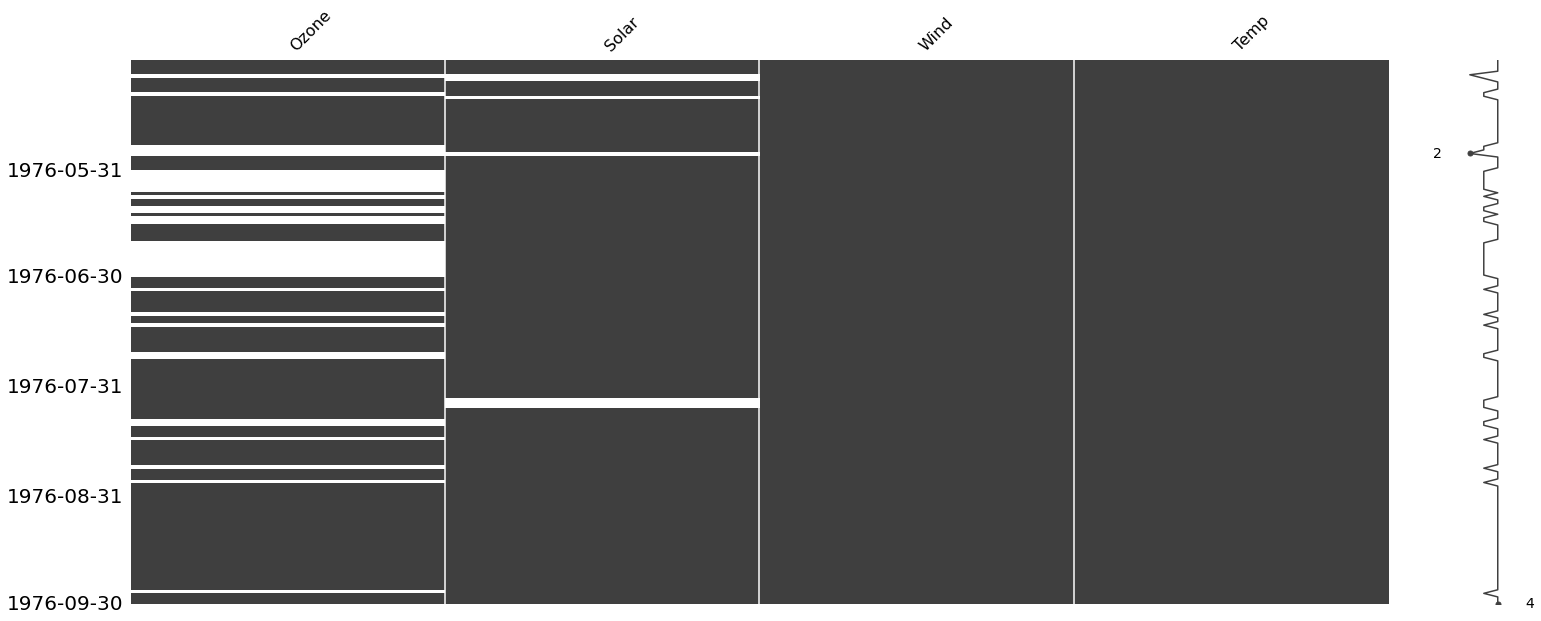

In [9]:

# Plot nullity matrix of airquality with frequency 'M'
msno.matrix(airquality, freq='M')

#### From the above graph, we can say that we are seeing lot of missing values occuring in the month of June

### Splice airquality from May-1976-Jul-1976

<AxesSubplot:>

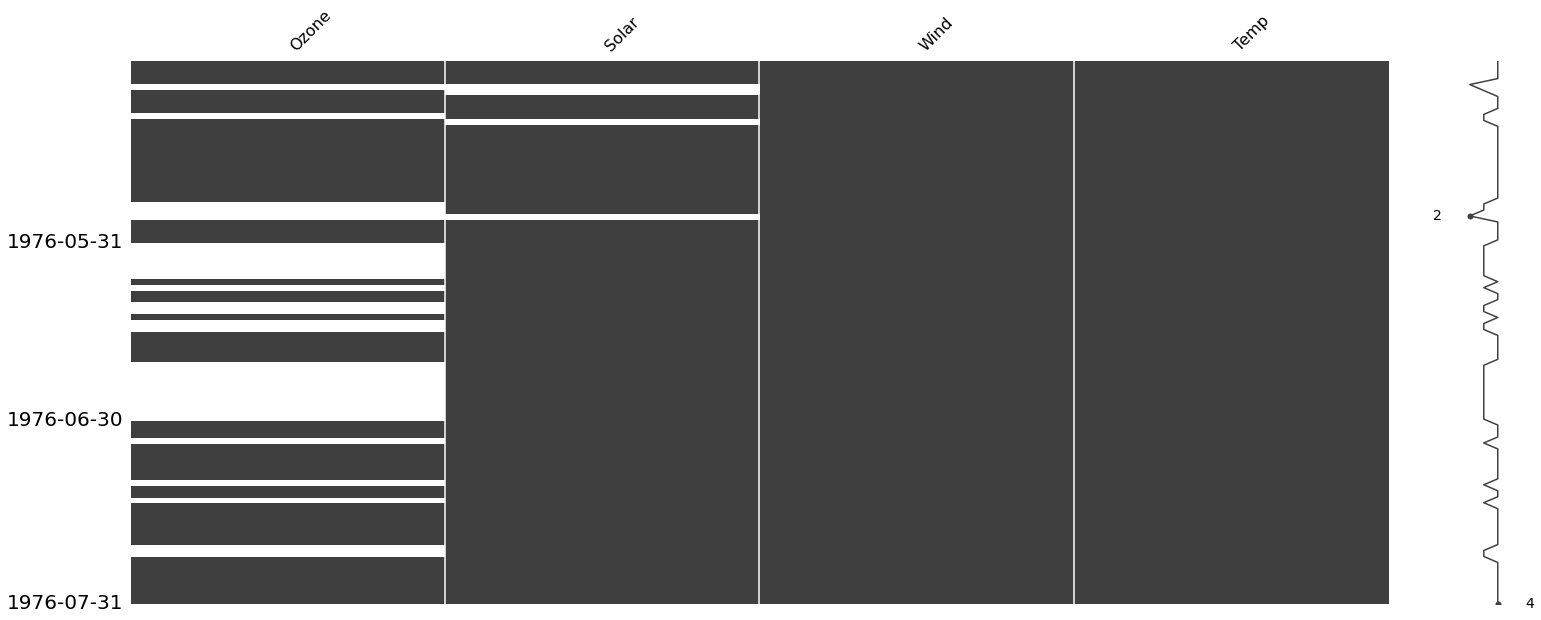

In [10]:
# Plot the sliced nullity matrix of airquality with frequency 'M'
msno.matrix(airquality.loc['May-1976':'Jul-1976'], freq='M')

### Imputing time-series data

We can use the '.fillna()' method to impute missing values in a time-series DataFrame. 'fillna()' has two strategies 'ffill' or 'pad' and 'bfill' or 'backfill' which can be selected using the argument 'method'. Ffill method  to "ffill" it replaces all 'NaN's with the last observed value. It can be declared as 'airquality.fillna()' of 'method="ffill"'. The 'interpolate()' method is highly appropriate for imputing time-series data. This method has more complex strategies which can draw patterns from non-missing values to predict missing ones.

In [13]:
print(airquality[30:40])

            Ozone  Solar  Wind  Temp
Date                                
1976-05-31   37.0  279.0   7.4    76
1976-06-01    NaN  286.0   8.6    78
1976-06-02    NaN  287.0   9.7    74
1976-06-03    NaN  242.0  16.1    67
1976-06-04    NaN  186.0   9.2    84
1976-06-05    NaN  220.0   8.6    85
1976-06-06    NaN  264.0  14.3    79
1976-06-07   29.0  127.0   9.7    82
1976-06-08    NaN  273.0   6.9    87
1976-06-09   71.0  291.0  13.8    90


In [14]:
# Interpolate the NaNs linearly
airquality.interpolate(method='linear', inplace=True)

# Print after interpolation
print(airquality[30:40])

                Ozone  Solar  Wind  Temp
Date                                    
1976-05-31  37.000000  279.0   7.4    76
1976-06-01  35.857143  286.0   8.6    78
1976-06-02  34.714286  287.0   9.7    74
1976-06-03  33.571429  242.0  16.1    67
1976-06-04  32.428571  186.0   9.2    84
1976-06-05  31.285714  220.0   8.6    85
1976-06-06  30.142857  264.0  14.3    79
1976-06-07  29.000000  127.0   9.7    82
1976-06-08  50.000000  273.0   6.9    87
1976-06-09  71.000000  291.0  13.8    90


### Visualizing Time-series Imputations 


<div>
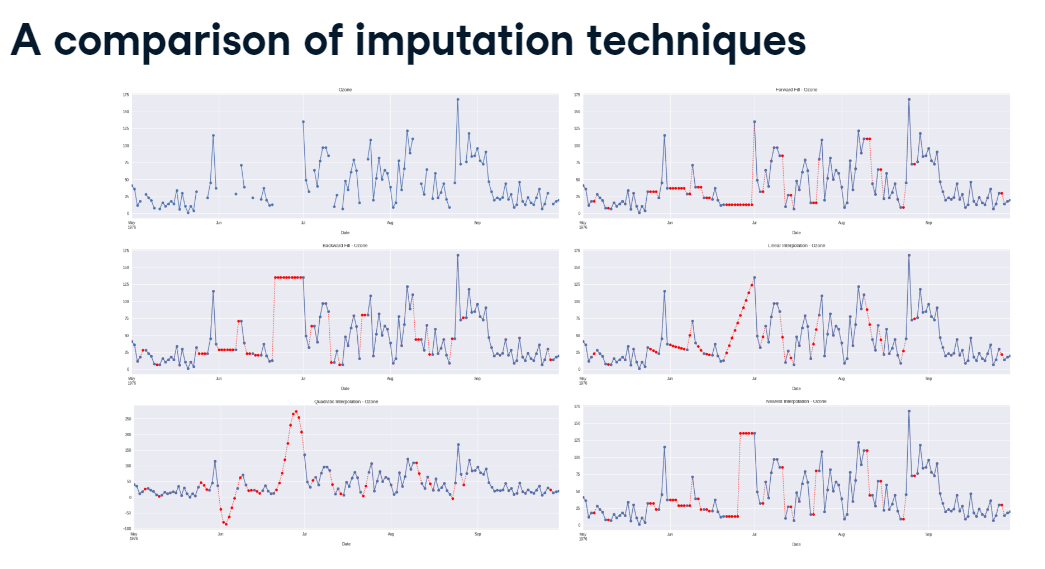
</div>

Above image shows 6 graphs:<br />
* First row:
    * with null values
    * Ffill imputation
* Second row:
    * bfill imputation
    * Linear interpolation
* Third row:
    * Quadratic interpolation
    * Nearest interpolation

#### Airquality Time-Series plot

<AxesSubplot:title={'center':'Ozone'}, xlabel='Date'>

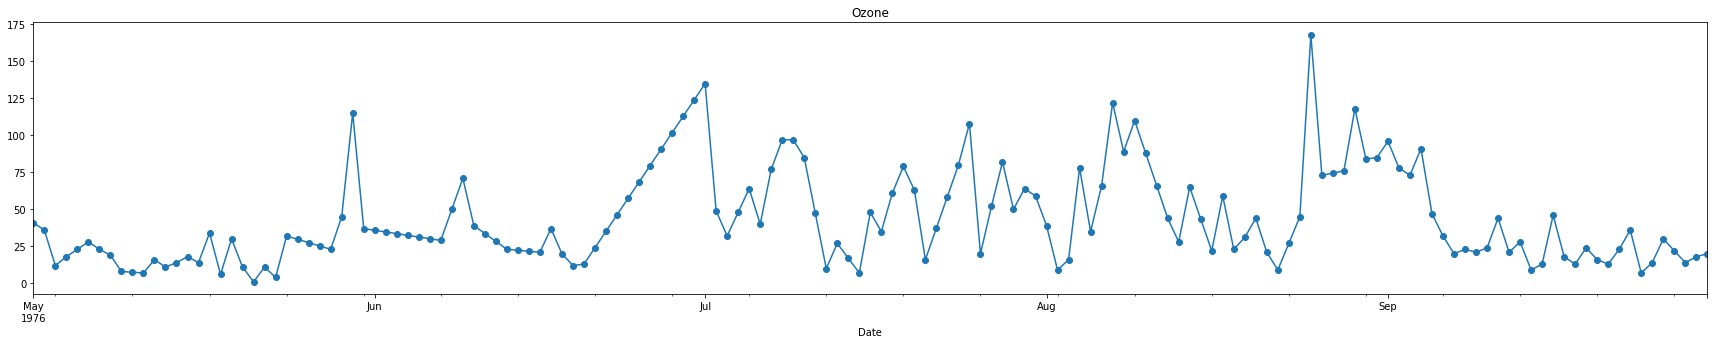

In [16]:
airquality['Ozone'].plot(title='Ozone', marker='o',figsize=(30,5))